In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
class KMeans:
    def __init__(self, k: int = 3, max_iters: int = 100) -> None:
        self.k = k
        self.max_iters = max_iters
        self.clusters = np.empty((self.k, 1))

    def _euclidean_distance(self, x1, x2) -> float:
        return np.sqrt(np.sum((x2 - x1)**2))

    def _closest_centroid(self, sample) -> float:
        distances = [self._euclidean_distance(sample, point) for point in self.centroids]
        return np.argmin(distances)

    def _create_clusters(self):
        clusters = [[] for _ in range(self.k)]
        for i, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample)
            clusters[centroid_idx].append(i)
        return clusters

    def _get_centroids(self) -> np.ndarray:
        centroids = np.zeros((self.k, self.n_features))
        for i, cluster in enumerate(self.clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[i] = cluster_mean
        return centroids

    def _is_converged(self, centroid_old) -> bool:
        distances = [self._euclidean_distance(centroid_old[i], self.centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def _get_cluster_labels(self) -> np.ndarray:
        labels = np.empty(self.n_samples)
        for i, cluster in enumerate(self.clusters):
            for j in cluster:
                labels[j] = i
        return labels

    def predict(self, X: np.ndarray):
        self.X = X
        self.n_samples, self.n_features = X.shape
        self.centroids = [self.X[i] for i in np.random.choice(self.n_samples, self.k, replace=False)]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters()
            centroid_old = self.centroids
            self.centroids = self._get_centroids()

            if self._is_converged(centroid_old):
                break

        return self._get_cluster_labels()

In [3]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, shuffle=True, random_state=0)

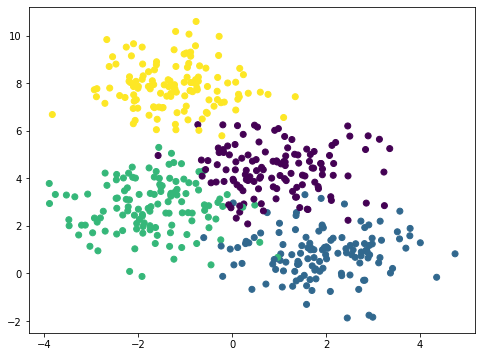

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
model = KMeans(k=4)
pred = model.predict(X)

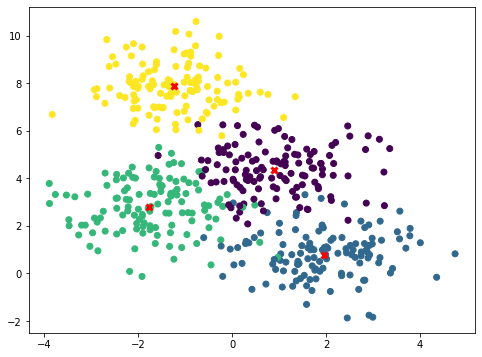

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], marker="x", c="r", linewidths=3)